# Dehli-Indian-Housing-Analysis-Part-5-Predict-Rental-Price-with-Everything-Size-numBedroom-numBathroom-Location-Name-and-House-Type by Dumisani Maxwell Mukuchura

## Dataset Source: https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price

### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

#### This Project will explore the Dehli Indian Housing and build a model predicting the Rental Price from Everything i.e the following features: House Size, Number of Bedrooms, Number of Bathrooms, Location Name and House Type. A total of 5 features.

## 1. Prepare Data

### Module and Library Import

In [30]:
# OS File and Directory Operations 
import os

#For Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Splitting the Data into Training and Test Data
from sklearn.model_selection import train_test_split

#For One Hot Encoding Categorical Features
from category_encoders import OneHotEncoder

#For Model Building
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

#For Dashboard 
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

#For Exporting the Trained Model
import joblib

In [2]:
#Import Data building from Part 1 to Part 4 we have Clean DataFrame to be imported 

#Get current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get to the data folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV File 
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

#Read the CSV file into a DataFrame
housing_data = pd.read_csv(csv_file_path)

#Make a copy and keep the Original Dataset intact
housing_df = housing_data.copy()

housing_df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Independent Floor,Guru Angad Nagar,Delhi,28.635309,77.224960,13000,INR,2.0,1.0,Negotiable,0.29,Posted 4 years ago,Itâs a 2 bhk builder floor situated in Guru ...,"13,000",Unfurnished,2,BHK,517.0,151.59
1,Independent House,Tuglak Road,Delhi,28.595453,77.210335,2162955,INR,4.0,2.0,Not Negotiable,4.03,Posted a year ago,Well designed 5 bhk independent house is avail...,"65,41,919",Unfurnished,5,BHK,6251.0,25221.02
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
3,Independent Floor,Saket,Delhi,28.523548,77.200142,235562,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Itâs a 3 bhk builder floor situated in Saket...,"7,51,225",Unfurnished,3,BHK,2855.0,2746.76
4,Independent Floor,Saket,Delhi,28.523548,77.200142,301011,INR,3.0,2.0,Not Negotiable,1.28,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,10,202",Unfurnished,3,BHK,2741.0,3509.92


## 2. Explore

### Understand the Data in accordance to the selected 5 Features: House Size, Number of Bedrooms, Number of Bathrooms, Location Name and House Type

In [3]:
#Check info of the DataFrame

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  numBedroom          2171 non-null   int64  
 16  house_

- We are interested in the following features: house_type, location, numBathrooms, numBedroom, house_size_in_sqft which are in correct variable type bt a rename of numBedroom to numBedrooms is more conventional then we will look into each and everyone of these features 

In [4]:
# Find how many unique values are within the categorical features: house_type, location

unique_house_types = housing_df["house_type"].nunique()
unique_house_locations = housing_df["location"].nunique()

print("Unique Values within House Types:", unique_house_types) 
print("Unique Values within Location Name:", unique_house_locations)

Unique Values within House Types: 6
Unique Values within Location Name: 139


In [5]:
#Renaming numBedroom to numBedrooms
housing_df["numBedrooms"] = housing_df["numBedroom"]
housing_df.drop(columns = ["numBedroom"], inplace =True)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  house_layout        2171 non-null   object 
 16  house_

In [6]:
#View Dataframe Statistics
housing_df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt,house_size_in_sqft,price_approx_usd,numBedrooms
count,2171.000000,2171.000000,2.171000e+03,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.00000
mean,28.566712,77.194739,3.659040e+05,3.385997,2.000921,0.935583,4347.608936,4266.603293,3.60433
std,0.133386,0.064826,3.007127e+05,0.876349,0.490461,0.558816,2063.935942,3506.445355,1.02708
min,22.699059,76.008568,3.600000e+03,1.000000,1.000000,0.050000,150.000000,41.980000,1.00000
25%,28.542767,77.165047,2.824740e+05,3.000000,2.000000,0.600000,2856.000000,3293.775000,3.00000
50%,28.559500,77.206741,3.010220e+05,4.000000,2.000000,0.790000,5852.000000,3510.050000,4.00000
75%,28.578939,77.233330,4.010150e+05,4.000000,2.000000,1.230000,5896.000000,4676.010000,4.00000
max,28.805466,77.336205,3.010101e+06,8.000000,8.000000,4.450000,14521.000000,35099.130000,12.00000


'\nannot=True will display the correlation values in each cell.\n\nfmt=".2f" will format the correlation values to two decimal places.\n\ncmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).\n'

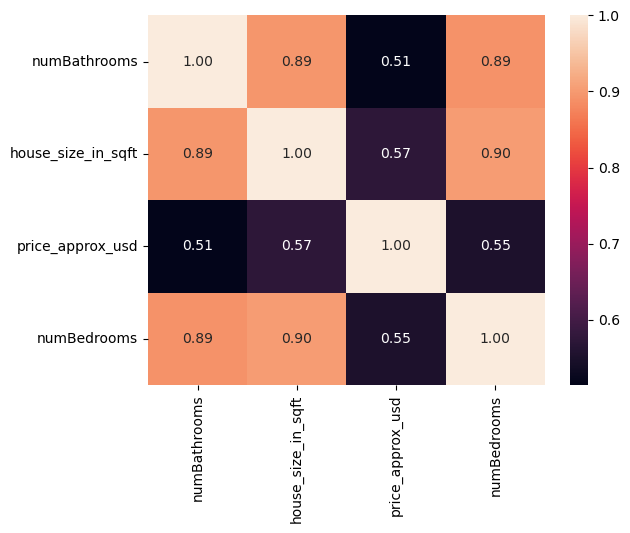

In [7]:
#Use a Heatmap to understand the Correlation of the numBedrooms, numBathrooms, house_size_in_sqft, price_approx_usd

corr = housing_df.select_dtypes("number").drop(columns= ["price", "priceSqFt", "latitude", "longitude", "numBalconies"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")

"""
annot=True will display the correlation values in each cell.

fmt=".2f" will format the correlation values to two decimal places.

cmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).
"""

- We have selected features that have a strong correlation with Approx Price USD but from the way we look at this it affects this building of the model due to MultiCollinearity we notice numBedrooms, numBathrooms and house_size_in_sqft so we shall drop them of them from this analysis as it is approximately 1 i.e 0.90, 0.89
- We shall keep house_size_in_sqft as it has a stronger correlation with Price as compared to numBedrooms and numBathrooms.
- Thus we have effectively been left with 3 features for model building: house_size_in_sqft, location, house_type

## 3. Split Data

### Splitting Data into Training and Test Data

In [8]:
#Creating Feature Matrice and Target Vector

features = ["house_size_in_sqft", "location", "house_type"]
target = "price_approx_usd"
X = housing_df[features]
y = housing_df[target]

#Splitting the data into Training and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size=0.2 means 20% of data goes to test and the 42 is for reproducibility in the randomness

#Confirm the split

print("X_train:\n", X_train.head())
print("X_test:\n", X_test.head())
print("y_train:\n", y_train.head())
print("y_test:\n", y_test.head())
print("Unique Values within Location Name:", X_train["location"].nunique())
print("Unique Values within House Type:", X_train["house_type"].nunique())

X_train:
       house_size_in_sqft            location          house_type
555               6521.0               Saket  Independent Floor 
1435              6251.0        Vasant Vihar  Independent Floor 
588               2856.0       Gulmohar park  Independent Floor 
1532              5896.0  Safdarjung Enclave  Independent House 
20                6251.0       Anand Niketan  Independent Floor 
X_test:
       house_size_in_sqft         location          house_type
1652              5896.0         Jor bagh  Independent Floor 
342               5896.0     Sunder Nagar  Independent Floor 
1342               600.0  Panchsheel Park  Independent Floor 
765               2856.0    Anand Niketan  Independent Floor 
865               6521.0     Vasant Vihar  Independent Floor 
y_train:
 555     3510.05
1435    3512.41
588     3511.12
1532    7463.90
20      4222.55
Name: price_approx_usd, dtype: float64
y_test:
 1652    5877.04
342     3509.93
1342     757.93
765     3509.93
865     3509.92
N

- When we started we had Unique Values within Location Name: 139 but ow they have dropped to 120 meaning 19 unique names fell into the Test Dataset only.
- We also do have only 5 unique House types instead of 6 meaning one was only in the Test Dataset after the split.

## 4. Build Model

### Create a Baseline - Average Result model

In [9]:
#Baseline Model that assumes the response is going always to be an Average (worst case scenario)

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print(y_pred_baseline[:5])
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print(f"The Mean of the Target Vector Price Approx USD is ${(y_mean).round(2)} and if we f we guessed it for every output we would be off by a +/- ${round(baseline_mae, 2)}")

[4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489, 4282.210351382489]
The Mean of the Target Vector Price Approx USD is $4282.21 and if we f we guessed it for every output we would be off by a +/- $2076.93


### Instantiate Transformer - OneHotEncoder and Build Pipeline

In [10]:
#Building the Pipeline of the Model

model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

#Fit the Model to Training Data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['location', 'house_type'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [11]:
#Check the Model is fitted with Data -1 to imply the Ridge

check_is_fitted(model[-1])

## 5. Evaluate Model

### Evaluate Model perfomance against its own Training Data

In [12]:
#Evaluate Model Performance against its own Training Data - Test on Training Data

y_pred_training = model.predict(X_train)
training_mae = mean_absolute_error(y_train, y_pred_training)

print(f"The Training MAE is +/- ${training_mae}")

The Training MAE is +/- $1054.9630275127543


- This is better than the Baseline MAE thus this model brings value.

In [13]:
#Evaluate Model Performance with a check on Generalization - Test on Test Data.

y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"The Test MAE is +/- ${test_mae}")

The Test MAE is +/- $1138.5816812095954


- This is still valuable model and since it has unique feature values which were missing in the training dataset an offset is expected. It still is better than the Baseline.

## 6. Communicate Results and Model Formular

In [14]:
#Get Intercepts and Coefficients for the Model

intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("Coefficients of the Ridge model length:", len(coefficients))
print(coefficients[:5])  # First five coefficients

# Get the associated Feature Names for the Model
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

Coefficients of the Ridge model length: 126
[3.25890382e-01 4.77425582e+00 6.57315016e+02 5.90802005e+02
 1.71393579e+02]
features len: 126
['house_size_in_sqft' 'location_Saket' 'location_Vasant Vihar'
 'location_Gulmohar park' 'location_Safdarjung Enclave']


- Reason we get 126 Coefficients is because of 1 from House Size in Square Feet, 5 from House Type and 120 from Location Name

In [15]:
# Create a series for the Features and Intercepts for the Model

feat_imp = pd.Series(coefficients, feature_names)
feat_imp.head()

house_size_in_sqft               0.325890
location_Saket                   4.774256
location_Vasant Vihar          657.315016
location_Gulmohar park         590.802005
location_Safdarjung Enclave    171.393579
dtype: float64

In [16]:
# Print the Fomular for the Model

print(f"rental_price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f}")

rental_price = 2897.12
+ (0.33 * house_size_in_sqft
+ (4.77 * location_Saket
+ (657.32 * location_Vasant Vihar
+ (590.8 * location_Gulmohar park
+ (171.39 * location_Safdarjung Enclave
+ (686.32 * location_Anand Niketan
+ (221.12 * location_Defence Colony
+ (-1447.55 * location_East of Kailash
+ (830.75 * location_West End
+ (451.34 * location_Greater Kailash II
+ (150.76 * location_Niti Bagh
+ (2759.31 * location_Golf Links
+ (247.14 * location_New Friends Colony
+ (8341.81 * location_Aurungzeb Road
+ (-38.01 * location_Green Park
+ (-1139.72 * location_Sarita Vihar
+ (-1796.92 * location_Sainik Farm
+ (-1112.66 * location_New Rajinder Nagar
+ (-1864.98 * location_Ghitorni
+ (8586.59 * location_Tuglak Road
+ (760.13 * location_Shanti Niketan
+ (157.01 * location_Green Park Extension
+ (413.97 * location_Uday Park
+ (-669.49 * location_Old Rajender Nagar
+ (-2567.01 * location_Mayur Vihar 2 Phase
+ (320.93 * location_Friends Colony
+ (-1065.64 * location_Shakti Nagar
+ (7504.54 * locat

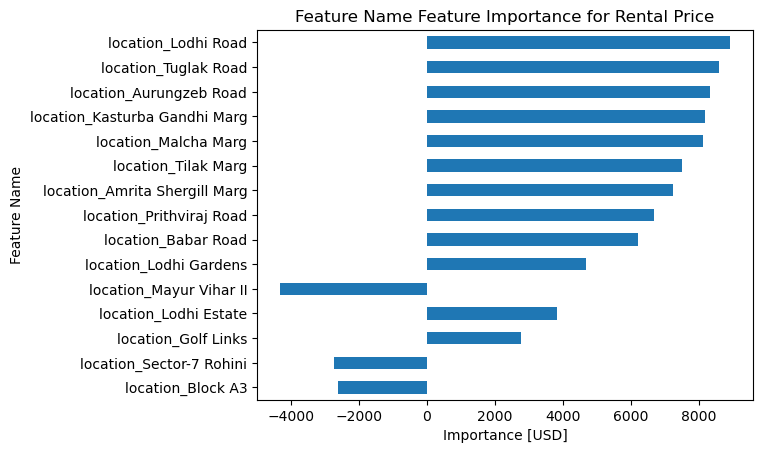

In [17]:
# Bar Chat of the Most Important Categories affecting the Rental Price 

feat_imp.sort_values(key=abs).tail(15).plot(kind = "barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature Name")
plt.title("Feature Name Feature Importance for Rental Price");

## 7. Deploying the model

- we can deploy a model creation of a Function or an Interactive Dashboard

In [31]:
#Dumping the Trained Model
joblib.dump(model, 'dehli_rent_prediction_model.pkl')

['dehli_rent_prediction_model.pkl']

In [18]:
def make_prediction(house_size, location_name, house_type):
    data = {
        "house_size_in_sqft": house_size,
        "location": location_name,
        "house_type": house_type
    }
    df = pd.DataFrame(data, index = [0])  #We have only One Row
    prediction = model.predict(df).round(2)[0]

    return f"Predicted Rental Price: ${prediction}"

In [19]:
#Test the make_predicition function 

#Took row 1 from the initial .head check Independent Floor, Guru Angad Nagar,  517.0

make_prediction(517.0, "Guru Angad Nagar", "Independent Floor")

'Predicted Rental Price: $2259.11'

In [22]:
import pandas as pd
from ipywidgets import interact, Dropdown, FloatSlider
from IPython.display import display


# This function will now simply return the value to be displayed.
def make_prediction_widget(house_size, location_name, house_type):
    data = {
        "house_size_in_sqft": house_size,
        "location": location_name,
        "house_type": house_type
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted Rental Price: ${prediction}"

# Use 'interact' to automatically create and display the dashboard.
# 'interact' links the widgets directly to the function.
interact(
    make_prediction_widget,
    house_size=FloatSlider(
        min=float(X_train["house_size_in_sqft"].min()),
        max=float(X_train["house_size_in_sqft"].max()),
        value=float(X_train["house_size_in_sqft"].mean()),
        description='House Size'
    ),
    location_name=Dropdown(
        options=sorted(X_train["location"].unique()),
        description='Location'
    ),
    house_type=Dropdown(
        options=sorted(X_train["house_type"].unique()),
        description='House Type'
    )
);

interactive(children=(FloatSlider(value=4337.957373271889, description='House Size', max=9500.0, min=150.0), D…